# Step1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step2: Import the Dataset

In [2]:
def answer_one(): 
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_iris 
    cancer = load_iris()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

df = answer_one()

# Step3: Data Overview

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Step4: EDA 

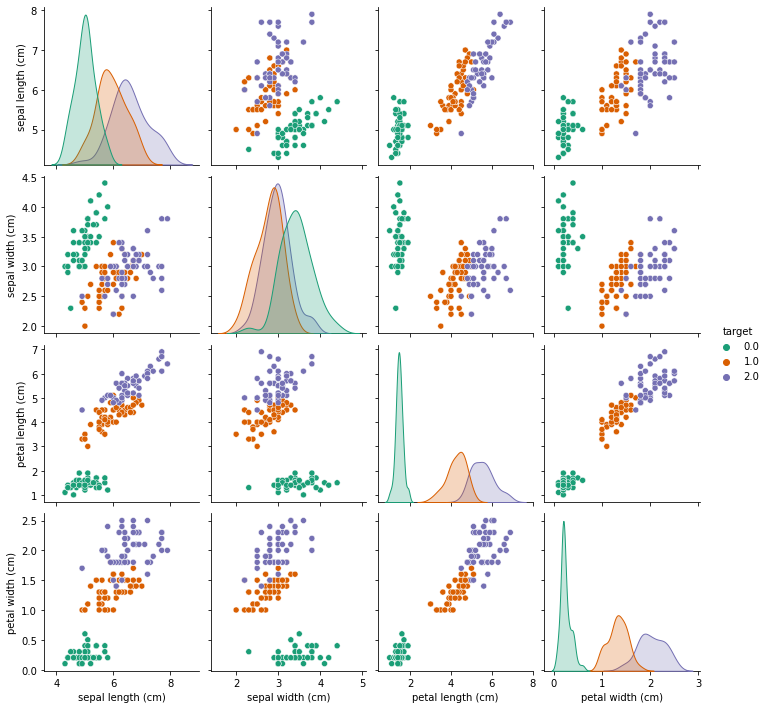

In [7]:
sns.pairplot(data=df, hue='target',palette='Dark2')

<AxesSubplot:>

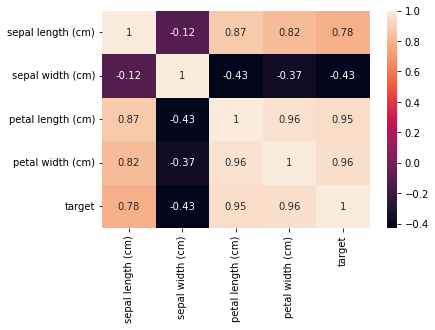

In [8]:
sns.heatmap(data= df.corr(), annot=True, fmt='.2g')

In [9]:
df.corr()['target']

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

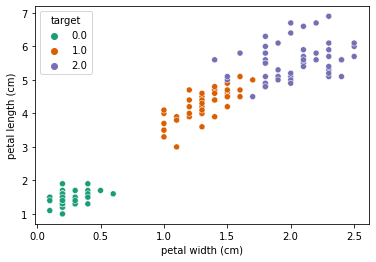

In [10]:
sns.scatterplot(data= df, x='petal width (cm)', y='petal length (cm)', hue='target',  palette='Dark2')

# Step5: Determine the Features & Target Variable

In [11]:
X= df.drop('target', axis=1)
y= df['target']

# Step6: Split the Dataset to Train & Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# PART 01: Decision Trees

# Step7: Train the Model

In [13]:
from sklearn.tree import DecisionTreeClassifier 
model_decisionTree= DecisionTreeClassifier()
model_decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

# Step8: Predicting Test Data

In [14]:
y_pred_decisionTree= model_decisionTree.predict(X_test)

# Step9: Evaluating the Model

## 🟣 Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_decisionTree)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

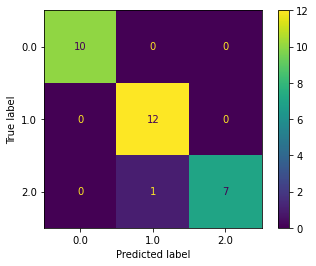

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_decisionTree, X= X_test, y_true= y_test)

### Classification Report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_decisionTree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Step10: Print Feature Importance

In [18]:
model_decisionTree.feature_importances_

array([0.01668057, 0.        , 0.52863497, 0.45468446])

In [19]:
pd.DataFrame(data=model_decisionTree.feature_importances_, index=X.columns, columns=['Feature Importance'])

,Feature Importance
sepal length (cm),0.016681
sepal width (cm),0.000000
petal length (cm),0.528635
petal width (cm),0.454684


# Step11: Visualize the Tree

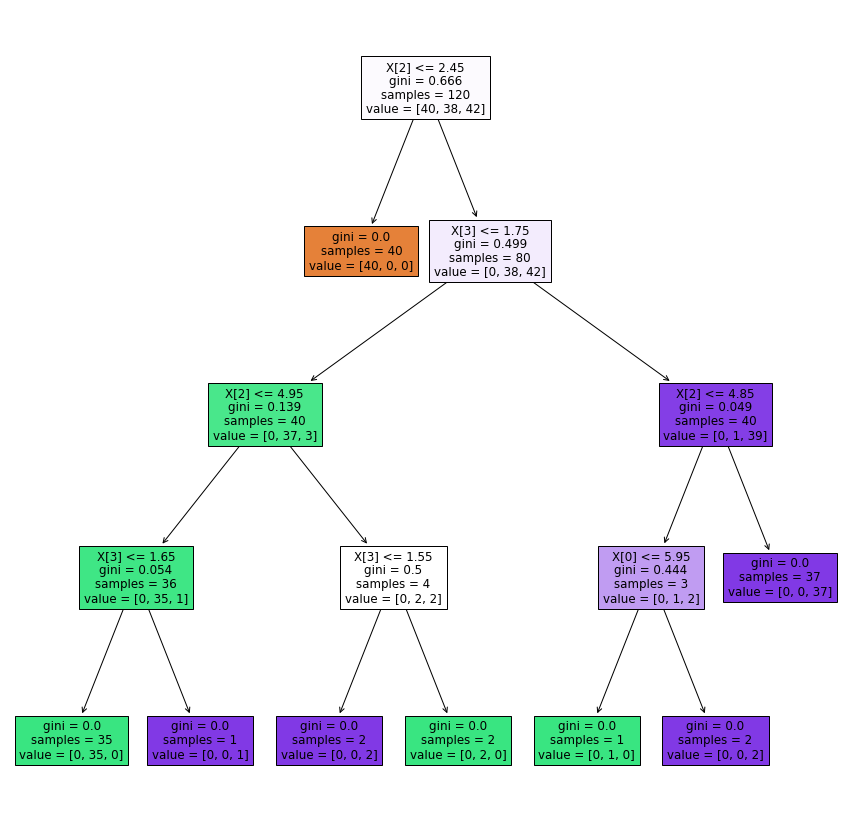

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(model_decisionTree, filled= True);

# Step12: Understanding Hyperparameters

In [21]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

## 🟣 Max Depth

In [22]:
model_decisionTree_pruned= DecisionTreeClassifier(max_depth=3)
model_decisionTree_pruned.fit(X_train, y_train)
y_pred_decisionTree_pruned= model_decisionTree_pruned.predict(X_test)

### Classification Report

In [23]:
print(classification_report(y_test, y_pred_decisionTree_pruned))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



### Plot Tree

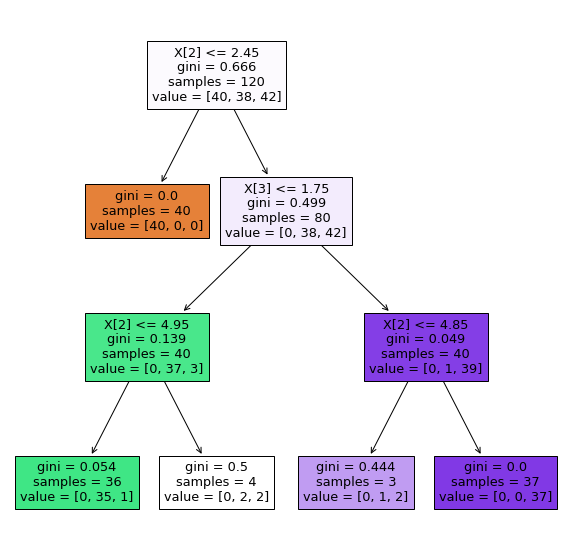

In [24]:
plt.figure(figsize=(10,10))
plot_tree(model_decisionTree_pruned, filled=True);

## 🟣 Max Leaf Nodes

In [25]:
model_decisionTree_maxLeafNodes= DecisionTreeClassifier(max_leaf_nodes=3)
model_decisionTree_maxLeafNodes.fit(X_train, y_train)
y_pred_decisionTree_maxLeafNodes= model_decisionTree_maxLeafNodes.predict(X_test)

### Classification Report

In [26]:
print(classification_report(y_test, y_pred_decisionTree_maxLeafNodes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



### Plot Tree

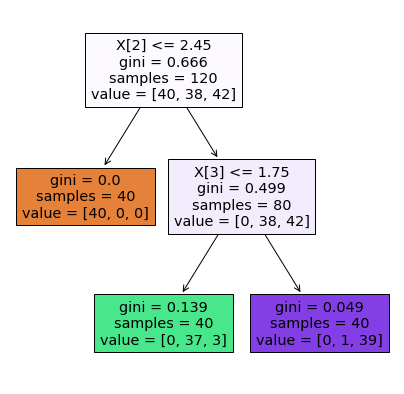

In [27]:
plt.figure(figsize=(7,7))
plot_tree(model_decisionTree_maxLeafNodes, filled=True);

## 🟣 Criterion

In [28]:
model_decisionTree_criterion= DecisionTreeClassifier(criterion='entropy')
model_decisionTree_criterion.fit(X_train, y_train)
y_pred_decisionTree_criterion= model_decisionTree_criterion.predict(X_test)

### Classification Report

In [29]:
print(classification_report(y_test, y_pred_decisionTree_criterion))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Plot Tree

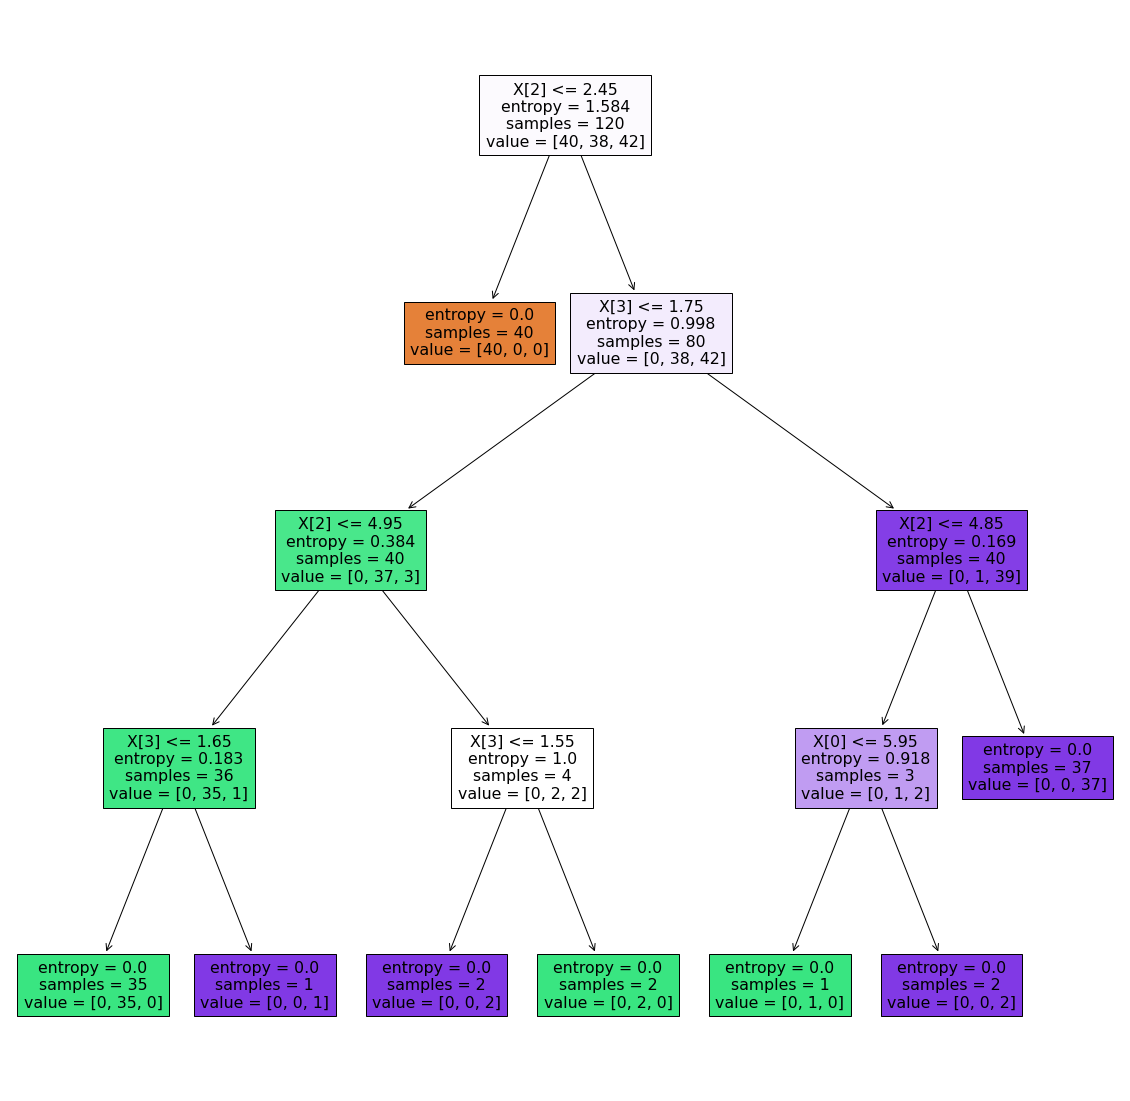

In [30]:
plt.figure(figsize=(20,20))
plot_tree(model_decisionTree_criterion,filled=True);

# PART 02: Random Forest

# Step13: Train the Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest= RandomForestClassifier(n_estimators=100, max_features='auto', random_state=101)
model_randomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

# Step14: Predicting Test Data

In [32]:
y_pred_randomForest= model_randomForest.predict(X_test)

# Step15: Evaluating the Model

## 🟣 Confusion Matrix

In [33]:
confusion_matrix(y_test, y_pred_randomForest)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

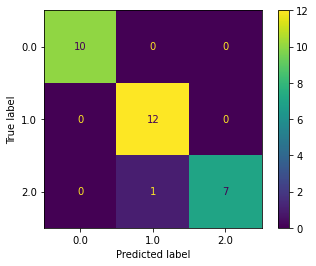

In [34]:
plot_confusion_matrix(model_randomForest, X=X_test , y_true= y_test)

### Classification Report

In [35]:
print(classification_report(y_test, y_pred_randomForest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Step16: Print Feature Importance

In [36]:
model_randomForest.feature_importances_

array([0.11822945, 0.02844616, 0.41840488, 0.43491951])

In [37]:
pd.DataFrame(data=model_randomForest.feature_importances_, index=X.columns, columns=['Feature Importance'])

,Feature Importance
sepal length (cm),0.118229
sepal width (cm),0.028446
petal length (cm),0.418405
petal width (cm),0.434920


# Step17: Grid Search

In [38]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

## Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV
parameters= {'n_estimators':[100, 200], 'criterion':("gini", "entropy"), 'max_depth':[1,2,3,4,5,6]}
randomForest_model= RandomForestClassifier(oob_score=True);
randomForest_grid= GridSearchCV(randomForest_model, param_grid= parameters, cv=5);
randomForest_grid.fit(X_train, y_train);

In [40]:
randomForest_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

## Predict

In [41]:
y_pred_randomForest_grid= randomForest_grid.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred_randomForest_grid)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

## Classification Report

In [43]:
print(classification_report(y_test, y_pred_randomForest_grid))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## OOB Error

In [44]:
1 - randomForest_grid.best_estimator_.oob_score_

0.050000000000000044

## OOB.oob_score

In [45]:
randomForest_grid.best_estimator_.oob_score_

0.95

# PART 03: K-Means Clustering

# Step18: Creating and Fitting a KMeans Model

In [46]:
# scaling features
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_scaled= Scaler.fit_transform(X)

In [47]:
# importing model

from sklearn.cluster import KMeans
model_Kmean= KMeans(n_clusters=2)
cluster_labels= model_Kmean.fit_predict(X_scaled)

In [48]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
X['cluster']= cluster_labels

Plotting most important features' scatter plot and check what did k-mean clustering do. 

In [50]:
X.corr()['cluster']

sepal length (cm)   -0.717416
sepal width (cm)     0.603348
petal length (cm)   -0.922765
petal width (cm)    -0.887344
cluster              1.000000
Name: cluster, dtype: float64

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

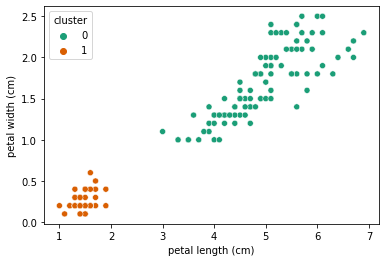

In [51]:
sns.scatterplot(data= X, x='petal length (cm)', y='petal width (cm)', hue='cluster', palette='Dark2')

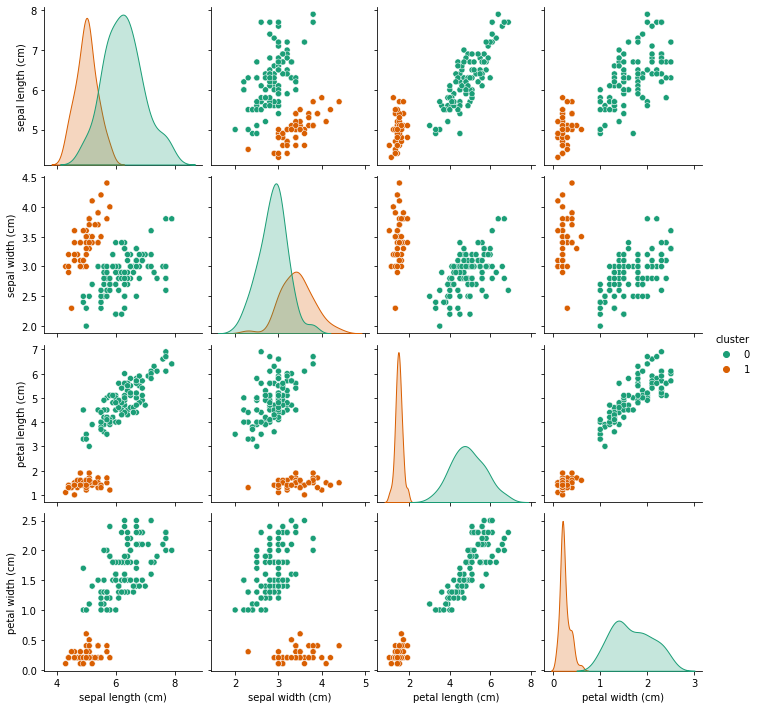

In [52]:
sns.pairplot(data=X, hue='cluster', palette='Dark2')

<AxesSubplot:>

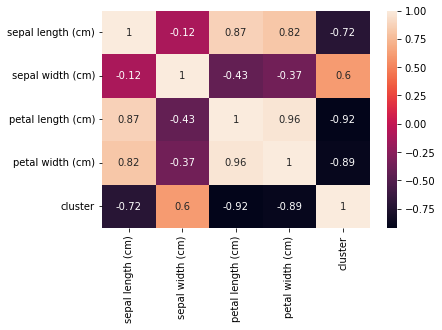

In [53]:
sns.heatmap(X.corr(),annot= True)

<AxesSubplot:>

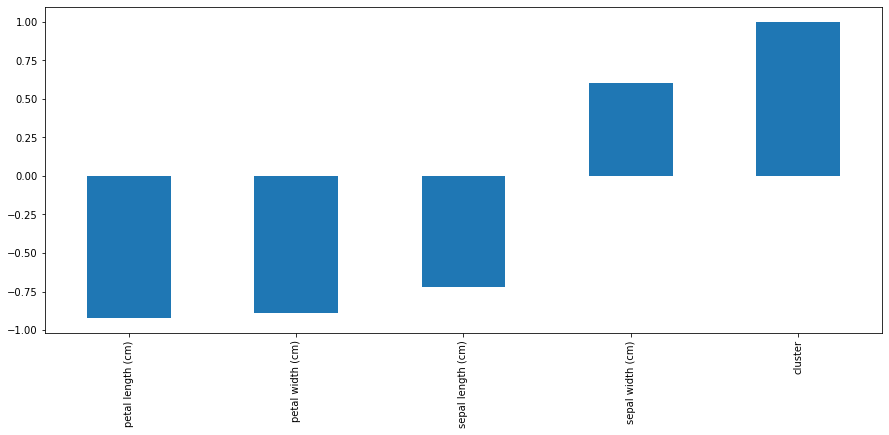

In [54]:
plt.figure(figsize=(15,6))
X.corr()['cluster'].sort_values().plot(kind='bar')

# Step19: Choosing K Value

In [55]:
ssd= [] # Sum of Squared Distances
for k in range(2,10):
    model= KMeans(n_clusters=k)
    model.fit(X_scaled)
    
    ssd.append(model.inertia_)

In [56]:
ssd

[222.36170496502302,
 139.82049635974974,
 114.30480331856761,
 91.04654959178747,
 80.0224959955744,
 71.91541999115367,
 62.658266973691774,
 54.2989457281874]

## 🟣 Plot--> K Value, Sum of Squared Distances

Text(0.5, 0, 'K value')

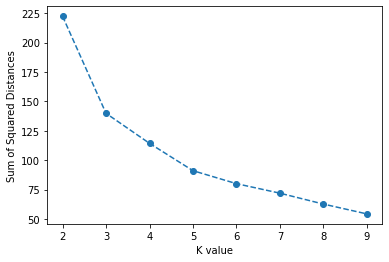

In [57]:
plt.plot(range(2,10), ssd, 'o--')
plt.ylabel('Sum of Squared Distances')
plt.xlabel('K value')

In [58]:
pd.Series(ssd,index=range(2,10)).diff()

2          NaN
3   -82.541209
4   -25.515693
5   -23.258254
6   -11.024054
7    -8.107076
8    -9.257153
9    -8.359321
dtype: float64

<AxesSubplot:>

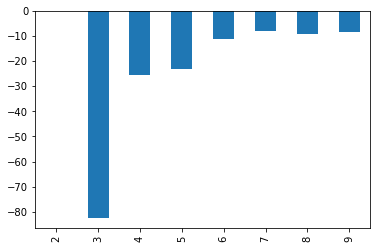

In [59]:
pd.Series(ssd,index=range(2,10)).diff().plot(kind='bar')

## What's your choice?
<hr>

Answer: <br> According to the plot and bar plot, from k=3 to k=4, the decreasing rate of SSD has reduced(compared to k=2 to k=3 ). <br>
And also, from k=5 to k=6, the decreasing rate of SSD has reduced.<br>
According to our domain knowledge and these results, **k=3** is a reasonable choice. 

In [60]:
# removing cluster column from X 
X= X.drop('cluster', axis=1)

In [61]:
X.shape

(150, 4)

# PART 04: Principal Component Analysis(PCA)

# Step20: Build the model

In [62]:
from sklearn.decomposition import PCA
model_PCA= PCA(n_components=2)
principal_components= model_PCA.fit_transform(X_scaled)

## Plot

Text(0, 0.5, 'Second Principal Component')

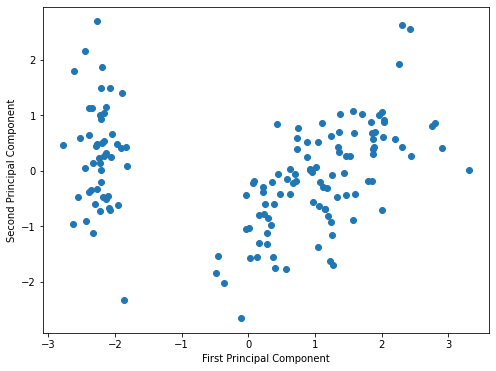

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Step21: Model Components

In [64]:
model_PCA.n_components

2

In [65]:
model_PCA.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## We can visualize this relationship with a heatmap:

In [66]:
df_components= pd.DataFrame(data= model_PCA.components_, index= ['PCA1','PCA2'], columns=X.columns)
df_components

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA1,0.521066,-0.269347,0.580413,0.564857
PCA2,0.377418,0.923296,0.024492,0.066942


<AxesSubplot:>

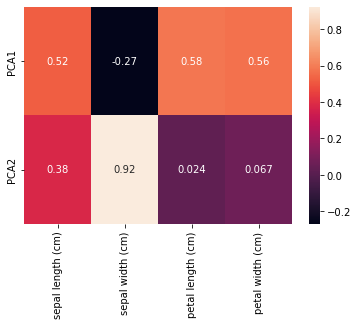

In [67]:
sns.heatmap(df_components, annot= True)

# Step22: Calculating the Explained Variance by the Component

In [68]:
model_PCA.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [69]:
np.sum(model_PCA.explained_variance_ratio_)

0.9581320720000164

# Choosing n-components

In [70]:
explained_variance=[]

for num_comp in range(1,5):
    pca = PCA(n_components= num_comp)
    pca.fit(X_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

In [71]:
explained_variance

[0.7296244541329986, 0.9581320720000164, 0.9948212908928452, 1.0]

## 🟣 Plot--> Number of Components, Variance Explained

Text(0, 0.5, 'Variance Explained')

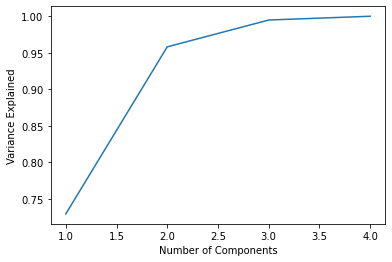

In [72]:
plt.plot(range(1,5), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

We could have 95 per cent of the information with 2 components and 99 per cent of the information with 3 components. 
Choosing 2 components is a reasonable choice because it contains 95 per cent of the information, and the feature space dimension is halved (We had 4 features, but after PCA, we have 2 principal components).